# Day 09. Exercise 02
# Metrics

## 0. Imports

In [11]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

from sklearn.metrics import confusion_matrix

## 1. Preprocessing

1. Create the same dataframe as in the previous exercise.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`. Use the additional parameter `stratify`.

In [14]:
df = pd.read_csv("data/dayofweek-not-scaled.csv")

In [15]:
X = df.drop(['dayofweek'], axis=1)
y = df['dayofweek']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,
                                                    random_state=21)

## 2. SVM

1. Use the best parameters from the previous exercise and train the model of SVM.
2. You need to calculate `accuracy`, `precision`, `recall`, `ROC AUC`.

 - `precision` and `recall` should be calculated for each class (use `average='weighted'`)
 - `ROC AUC` should be calculated for each class against any other class (all possible pairwise combinations) and then weighted average should be applied for the final metric
 - the code in the cell should display the result as below:

```
accuracy is 0.88757
precision is 0.89267
recall is 0.88757
roc_auc is 0.97878
```

In [26]:
svc = SVC(C=10, gamma='auto', probability=True, random_state=21, kernel='rbf')
svc.fit(X_train, y_train)

SVC(C=10, gamma='auto', probability=True, random_state=21)

In [28]:
y_pred = svc.predict(X_test)
print(f"accuracy is {accuracy_score(y_test, y_pred):.5f}")
print(f"precision is {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")
y_score = svc.predict_proba(X_test)
print(f"roc_auc is {roc_auc_score(y_test, y_score, multi_class='ovo', average='weighted'):.5f}")

accuracy is 0.88757
precision is 0.89267
recall is 0.88757
roc_auc is 0.97878


## 3. Decision tree

1. The same task for decision tree

In [36]:
dtc = DecisionTreeClassifier(max_depth=22, class_weight='balanced', random_state=21, criterion='gini')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=22, random_state=21)

In [38]:
y_pred = dtc.predict(X_test)
print(f"accuracy is {accuracy_score(y_test, y_pred):.5f}")
print(f"precision is {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")
y_score = dtc.predict_proba(X_test)
print(f"roc_auc is {roc_auc_score(y_test, y_score, multi_class='ovo', average='weighted'):.5f}")

accuracy is 0.89053
precision is 0.89262
recall is 0.89053
roc_auc is 0.93664


## 4. Random forest

1. The same task for random forest.

In [42]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=28, random_state=21, criterion='gini')
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=28, n_estimators=50, random_state=21)

In [44]:
y_pred = rfc.predict(X_test)
print(f"accuracy is {accuracy_score(y_test, y_pred):.5f}")
print(f"precision is {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall is {recall_score(y_test, y_pred, average='weighted'):.5f}")
y_score = rfc.predict_proba(X_test)
lr_auc = roc_auc_score(y_test, y_score, multi_class='ovo', average='weighted')
fpr, tpr, treshold = roc_curve(y_test, y_score[:,1], pos_label=1)
print(f"roc_auc is {lr_auc:.5f}")
roc_auc = auc(fpr, tpr)

accuracy is 0.92899
precision is 0.93009
recall is 0.92899
roc_auc is 0.99033


## 5. Predictions

1. Choose the best model.
2. Analyze: for which `weekday` your model makes the most errors (in % of the total number of samples of that class in your full dataset), for which `labname` and for which `users`.
3. Save the model.

In [48]:
rfc = RandomForestClassifier(n_estimators=100, max_depth = 28, 
                                criterion = "gini", random_state=21)
rfc.fit(X_train, y_train)
predict_rfr = rfc.predict(X_test)

In [50]:
df_forecast = pd.DataFrame({"predict":predict_rfr}, index= y_test.index)
df_fit = pd.DataFrame({"predict":rfc.predict(X_train)}, index= y_train.index)

In [76]:
df['forecast'] = pd.concat([df_fit, df_forecast])

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,forecast,Error
0,1,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,0
1,2,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,0
2,3,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,0
3,4,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,0
4,5,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,0
1682,6,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,0
1683,7,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,0
1684,8,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,0


In [56]:
df['Error'] = (df["forecast"]!=df.dayofweek)*1

In [58]:
error_analysis = df.groupby(['dayofweek']).agg(
    total_samples=('Error', 'size'),
    total_errors=('Error', 'sum')
).reset_index()
error_analysis

,dayofweek,total_samples,total_errors
0,0,136,7
1,1,274,5
2,2,149,2
3,3,396,2
4,4,104,3
5,5,271,3
6,6,356,1


In [64]:
error_analysis['perc_error'] = (error_analysis.total_errors/error_analysis.total_samples).round(2)
error_analysis.sort_values(by = 'perc_error', ascending=False)
error_analysis

,dayofweek,total_samples,total_errors,perc_error
0,0,136,7,0.05
1,1,274,5,0.02
2,2,149,2,0.01
3,3,396,2,0.01
4,4,104,3,0.03
5,5,271,3,0.01
6,6,356,1,0.00


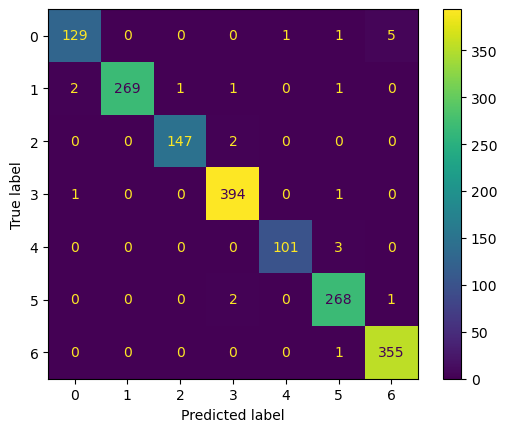

In [82]:
ConfusionMatrixDisplay.from_predictions(df['dayofweek'], df['forecast'])

In [86]:
((df[df.Error == 1].iloc[:,3:31].sum()/df.iloc[:,3:31].sum()).round(2)).sort_values(ascending=False)

uid_user_6     0.08
uid_user_16    0.06
uid_user_19    0.04
uid_user_27    0.04
uid_user_31    0.03
uid_user_30    0.03
uid_user_3     0.03
uid_user_18    0.03
uid_user_24    0.02
uid_user_29    0.02
uid_user_25    0.02
uid_user_10    0.01
uid_user_4     0.01
uid_user_14    0.01
uid_user_2     0.01
uid_user_28    0.00
uid_user_26    0.00
uid_user_0     0.00
uid_user_23    0.00
uid_user_22    0.00
uid_user_1     0.00
uid_user_20    0.00
uid_user_17    0.00
uid_user_15    0.00
uid_user_13    0.00
uid_user_12    0.00
uid_user_11    0.00
uid_user_21    0.00
dtype: float64

In [88]:
((df[df.Error == 1].iloc[:,33:-2].sum()/df.iloc[:,33:-2].sum()).round(2)).sort_values(ascending=False)

labname_lab03       1.00
labname_lab03s      1.00
labname_laba06      0.04
labname_lab05s      0.03
labname_laba04      0.03
labname_laba06s     0.02
labname_code_rvw    0.01
labname_project1    0.01
labname_lab02       0.00
labname_laba04s     0.00
labname_laba05      0.00
dtype: float64

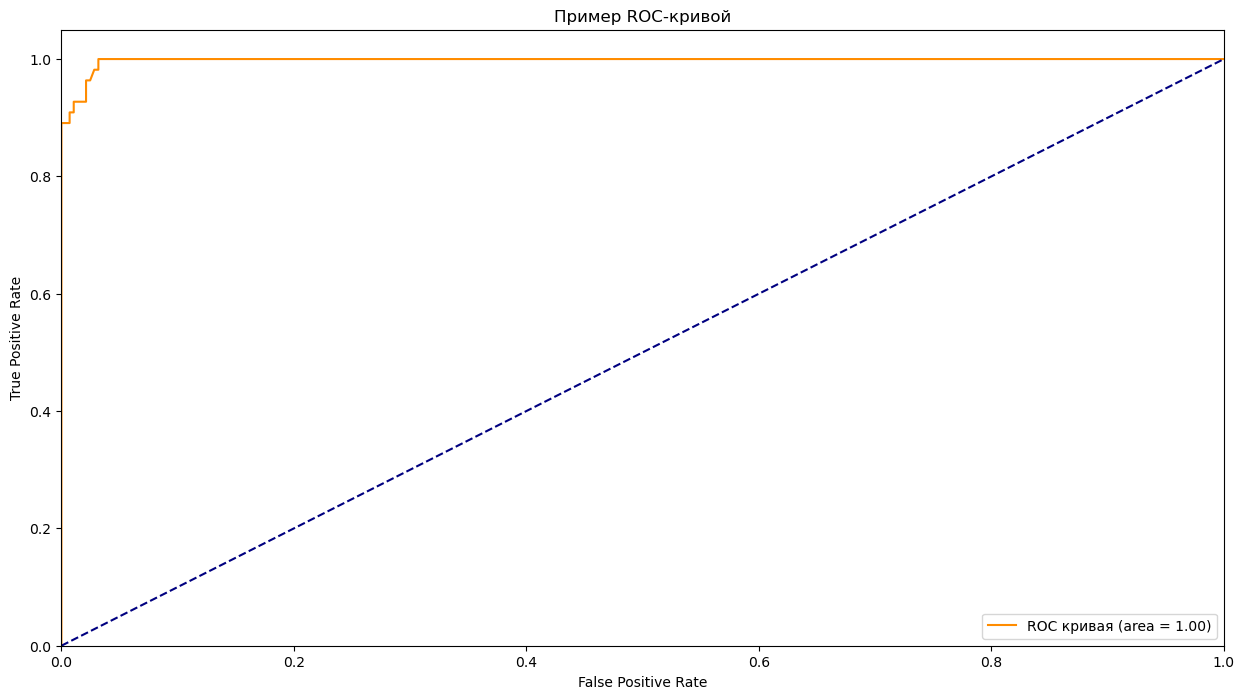

In [90]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Пример ROC-кривой')
ax.legend(loc="lower right")
plt.show()

In [92]:
joblib.dump(rfc, 'data/model.joblib')

['data/model.joblib']

## 6. Function

1. Write a function that takes a list of different models and a corresponding list of parameters (dicts) and returns a dict that contains all the 4 metrics for each model.

In [33]:
def calculate_metrics(estimator, X_test, y_test):
    y_pred = estimator.predict(X_test)
    y_score = estimator.predict_proba(X_test)
    return {'accuracy': round(accuracy_score(y_test, y_pred), 5),
            'precision': round(precision_score(y_test, y_pred, average='weighted'), 5),
            'recall': round(recall_score(y_test, y_pred, average='weighted'), 5),
            'roc_auc': round(roc_auc_score(y_test, y_score, average='weighted', multi_class='ovo'), 5)}

In [35]:
dtc = DecisionTreeClassifier(max_depth=22, class_weight='balanced', random_state=21, criterion='gini')
dtc.fit(X_train, y_train)
calculate_metrics(dtc, X_test, y_test)

{'accuracy': 0.89053,
 'precision': 0.89262,
 'recall': 0.89053,
 'roc_auc': 0.93664}

In [31]:
rfc = RandomForestClassifier(n_estimators=100, max_depth = 28, 
                                criterion = "gini", random_state=21)
rfc.fit(X_train, y_train)
calculate_metrics(rfc, X_test, y_test)

{'accuracy': 0.93195,
 'precision': 0.93313,
 'recall': 0.93195,
 'roc_auc': 0.98979}